In [1]:
%matplotlib inline
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import datetime as datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

print("Python Version:", sys.version)

Python Version: 3.8.3 (default, Jul  2 2020, 11:26:31) 
[Clang 10.0.0 ]


In [2]:
df= pd.read_csv('cleaned_imdb_mojo.csv')

In [3]:
df.drop(['Unnamed: 0'], inplace = True, axis = 1)
df = df.dropna()
df.reset_index(inplace = True)

In [4]:
distributor_gross_average = (df.groupby(['Distributor'])['Lifetime_Gross_MOJO'].sum())/(df['Distributor'].value_counts())
distributor_gross_average = distributor_gross_average.sort_values(ascending = False)
top_distributor_gross_average = distributor_gross_average.head(15)
top_distributor_gross_average

Sony Pictures Entertainment (SPE)      7.209102e+07
Warner Independent Pictures (WIP)      3.907228e+07
IMAX                                   1.565062e+07
Lionsgate                              1.552693e+07
Walt Disney Studios Motion Pictures    1.490551e+07
Overture Films                         1.436340e+07
Warner Bros.                           1.412085e+07
IDP Distribution                       1.153642e+07
United Artists                         1.091569e+07
Paramount Classics                     1.086079e+07
Focus Features                         8.761135e+06
Paramount Pictures                     5.607878e+06
National Geographic Entertainment      4.892484e+06
CBS Films                              4.600249e+06
Neon                                   4.430710e+06
dtype: float64

In [5]:
top_distributor_list = list(top_distributor_gross_average.index)

In [6]:
def distributor(x):
    if x in top_distributor_list:
        return(x)
    if x not in top_distributor_list:
        return('Other')
df['Distributor'] = df['Distributor'].apply(distributor)
df.drop(['index', 'Running_Time', 'Director'], inplace = True, axis = 1)
df1 = pd.get_dummies(df['Distributor'])
df = pd.concat([df, df1], axis=1)
df.drop(['Distributor'], inplace = True, axis = 1)
df

,Rank_MOJO_by_Box_office,Title,Lifetime_Gross_MOJO,Max_Theaters,Opening_Box,Opening_Th,User_Rating_IMDB,Metacritic,Number_of_votes_IMDB,Release_Difference,...,Neon,Other,Overture Films,Paramount Classics,Paramount Pictures,Sony Pictures Entertainment (SPE),United Artists,Walt Disney Studios Motion Pictures,Warner Bros.,Warner Independent Pictures (WIP)
0,1,Fahrenheit 9/11,119194771,2011.0,23920637.0,868.0,7.5,67.0,125629,8475.0,...,0,0,0,0,0,0,0,0,0,0
1,2,March of the Penguins,77437223,2506.0,137492.0,4.0,7.5,79.0,55375,8841.0,...,0,0,0,0,0,0,0,0,0,1
2,4,This Is It,72091016,3481.0,23234394.0,3481.0,7.2,67.0,38161,10428.0,...,0,0,0,0,0,1,0,0,0,0
3,5,Under the Sea 3D,36262926,108.0,661185.0,49.0,7.5,77.0,1730,10171.0,...,0,0,0,0,0,0,0,0,1,0
4,7,Earth,32011576,1804.0,8825760.0,1804.0,8.0,72.0,14137,10239.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,1972,Knuckle,2647,3.0,2647.0,3.0,6.8,65.0,2693,11200.0,...,0,1,0,0,0,0,0,0,0,0
520,1986,You're Gonna Miss Me,2324,1.0,1340.0,1.0,7.6,64.0,988,9555.0,...,0,1,0,0,0,0,0,0,0,0
521,1991,Workingman's Death,2214,2.0,2214.0,2.0,8.0,67.0,1647,9086.0,...,0,1,0,0,0,0,0,0,0,0
522,1998,"Accidental Courtesy: Daryl Davis, Race & America",1940,1.0,1452.0,1.0,7.7,63.0,1019,13055.0,...,0,1,0,0,0,0,0,0,0,0


In [7]:
#select x values, drop release_difference, rank_MOJO_by_Box_office 
X = df.loc[:, ['Lifetime_Gross_MOJO', 'Max_Theaters', 'Opening_Box',
                        'Opening_Th', 'User_Rating_IMDB','Number_of_votes_IMDB',
                        'Metacritic', 'CBS Films','Focus Features', 'IDP Distribution', 'IMAX', 'Lionsgate',
                        'National Geographic Entertainment', 'Neon', 'Other', 'Overture Films',
                        'Paramount Classics', 'Paramount Pictures',
                        'Sony Pictures Entertainment (SPE)', 'United Artists',
                        'Walt Disney Studios Motion Pictures', 'Warner Bros.',
                        'Warner Independent Pictures (WIP)']]

In [9]:
df['log_Lifetime_Gross_MOJO'] = np.log(df['Lifetime_Gross_MOJO'])

In [17]:
df['log_Max_Theaters'] = np.log(df['Max_Theaters'])
df['log_Opening_Box'] = np.log(df['Opening_Box'])
df['log_Opening_Th'] = np.log(df['Opening_Th'])
df['log_User_Rating_IMDB']= np.log(df['User_Rating_IMDB'])
df['log_Number_of_votes_IMDB']= np.log(df['Number_of_votes_IMDB'])

In [18]:
df.columns

Index(['Rank_MOJO_by_Box_office', 'Title', 'Lifetime_Gross_MOJO',
       'Max_Theaters', 'Opening_Box', 'Opening_Th', 'User_Rating_IMDB',
       'Metacritic', 'Number_of_votes_IMDB', 'Release_Difference', 'CBS Films',
       'Focus Features', 'IDP Distribution', 'IMAX', 'Lionsgate',
       'National Geographic Entertainment', 'Neon', 'Other', 'Overture Films',
       'Paramount Classics', 'Paramount Pictures',
       'Sony Pictures Entertainment (SPE)', 'United Artists',
       'Walt Disney Studios Motion Pictures', 'Warner Bros.',
       'Warner Independent Pictures (WIP)', 'log_Lifetime_Gross_MOJO',
       'log_Max_Theaters', 'log_Opening_Box', 'log_Opening_Th',
       'log_User_Rating_IMDB', 'log_Number_of_votes_IMDB'],
      dtype='object')

In [56]:
df['log_Number_of_votes_IMDB']

0      11.741088
1      10.921884
2      10.549569
3       7.455877
4       9.556551
         ...    
519     7.898411
520     6.895683
521     7.406711
522     6.926577
523     7.037028
Name: log_Number_of_votes_IMDB, Length: 524, dtype: float64

In [19]:
log_df = df.loc[:,['Metacritic', 'Title','CBS Films','Focus Features', 'IDP Distribution', 'IMAX', 'Lionsgate',
                'National Geographic Entertainment', 'Neon', 'Other', 'Overture Films',
                'Paramount Classics', 'Paramount Pictures',
                'Sony Pictures Entertainment (SPE)', 'United Artists',
                'Walt Disney Studios Motion Pictures', 'Warner Bros.',
                'Warner Independent Pictures (WIP)','log_Lifetime_Gross_MOJO','log_Max_Theaters',
                'log_Opening_Box', 'log_Opening_Th',
                'log_User_Rating_IMDB', 'log_Number_of_votes_IMDB']]
log_df.corr()

,Metacritic,CBS Films,Focus Features,IDP Distribution,IMAX,Lionsgate,National Geographic Entertainment,Neon,Other,Overture Films,...,United Artists,Walt Disney Studios Motion Pictures,Warner Bros.,Warner Independent Pictures (WIP),log_Lifetime_Gross_MOJO,log_Max_Theaters,log_Opening_Box,log_Opening_Th,log_User_Rating_IMDB,log_Number_of_votes_IMDB
Metacritic,1.000000,-0.048553,-0.003235,-0.009334,0.001871,-0.006542,0.059941,0.082172,0.069574,-0.076566,...,-0.037006,-0.082729,-0.043589,-0.029075,0.171300,0.052425,0.014334,-0.138719,0.443241,0.311185
CBS Films,-0.048553,1.000000,-0.003318,-0.001912,-0.001912,-0.006099,-0.003835,-0.004292,-0.139303,-0.001912,...,-0.002707,-0.004706,-0.004292,-0.002707,0.064237,0.070766,0.053962,0.051789,0.008985,-0.016166
Focus Features,-0.003235,-0.003318,1.000000,-0.003318,-0.003318,-0.010584,-0.006655,-0.007448,-0.241742,-0.003318,...,-0.004697,-0.008167,-0.007448,-0.004697,0.106414,0.119351,0.126427,0.120360,-0.022615,0.042388
IDP Distribution,-0.009334,-0.001912,-0.003318,1.000000,-0.001912,-0.006099,-0.003835,-0.004292,-0.139303,-0.001912,...,-0.002707,-0.004706,-0.004292,-0.002707,0.084939,0.064539,0.090634,0.074733,-0.016927,0.134658
IMAX,0.001871,-0.001912,-0.003318,-0.001912,1.000000,-0.006099,-0.003835,-0.004292,-0.139303,-0.001912,...,-0.002707,-0.004706,-0.004292,-0.002707,0.091807,0.053609,0.066639,0.110723,0.000464,-0.047402
Lionsgate,-0.006542,-0.006099,-0.010584,-0.006099,-0.006099,1.000000,-0.012233,-0.013691,-0.444354,-0.006099,...,-0.008634,-0.015012,-0.013691,-0.008634,0.143122,0.150353,0.127051,0.091122,0.031856,0.138070
National Geographic Entertainment,0.059941,-0.003835,-0.006655,-0.003835,-0.003835,-0.012233,1.000000,-0.008609,-0.279408,-0.003835,...,-0.005429,-0.009439,-0.008609,-0.005429,0.059086,0.057133,0.056499,-0.010095,0.078682,0.081903
Neon,0.082172,-0.004292,-0.007448,-0.004292,-0.004292,-0.013691,-0.008609,1.000000,-0.312688,-0.004292,...,-0.006075,-0.010564,-0.009634,-0.006075,0.104110,0.119220,0.080267,0.033412,0.018305,0.050843
Other,0.069574,-0.139303,-0.241742,-0.139303,-0.139303,-0.444354,-0.279408,-0.312688,1.000000,-0.139303,...,-0.197192,-0.342863,-0.312688,-0.197192,-0.418269,-0.452980,-0.458207,-0.400135,-0.023951,-0.236354
Overture Films,-0.076566,-0.001912,-0.003318,-0.001912,-0.001912,-0.006099,-0.003835,-0.004292,-0.139303,1.000000,...,-0.002707,-0.004706,-0.004292,-0.002707,0.089874,0.105100,0.067644,0.005306,0.000464,0.098272


In [47]:
smaller_log.columns

Index(['Metacritic', 'Title', 'log_Lifetime_Gross_MOJO', 'log_Max_Theaters',
       'log_Opening_Box', 'log_Opening_Th', 'log_User_Rating_IMDB',
       'log_Number_of_votes_IMDB'],
      dtype='object')

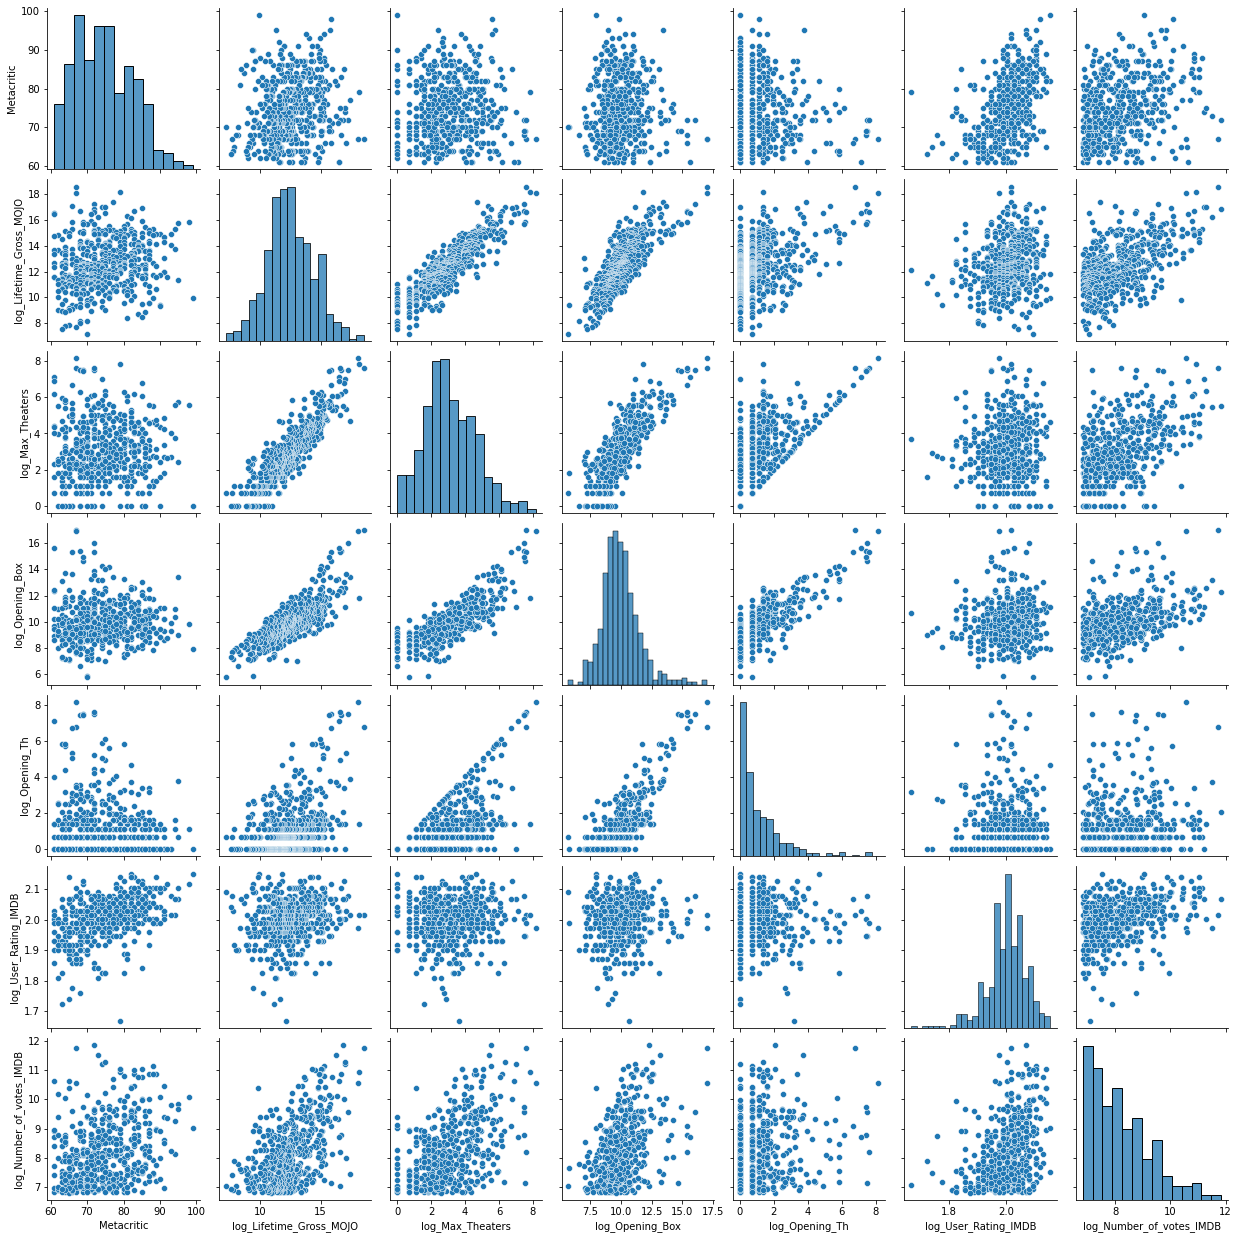

In [46]:
sns.pairplot(smaller_log)

In [28]:
log_df.columns

Index(['Metacritic', 'Title', 'CBS Films', 'Focus Features',
       'IDP Distribution', 'IMAX', 'Lionsgate',
       'National Geographic Entertainment', 'Neon', 'Other', 'Overture Films',
       'Paramount Classics', 'Paramount Pictures',
       'Sony Pictures Entertainment (SPE)', 'United Artists',
       'Walt Disney Studios Motion Pictures', 'Warner Bros.',
       'Warner Independent Pictures (WIP)', 'log_Lifetime_Gross_MOJO',
       'log_Max_Theaters', 'log_Opening_Box', 'log_Opening_Th',
       'log_User_Rating_IMDB', 'log_Number_of_votes_IMDB'],
      dtype='object')

In [35]:
df.columns

Index(['Rank_MOJO_by_Box_office', 'Title', 'Lifetime_Gross_MOJO',
       'Max_Theaters', 'Opening_Box', 'Opening_Th', 'User_Rating_IMDB',
       'Metacritic', 'Number_of_votes_IMDB', 'Release_Difference', 'CBS Films',
       'Focus Features', 'IDP Distribution', 'IMAX', 'Lionsgate',
       'National Geographic Entertainment', 'Neon', 'Other', 'Overture Films',
       'Paramount Classics', 'Paramount Pictures',
       'Sony Pictures Entertainment (SPE)', 'United Artists',
       'Walt Disney Studios Motion Pictures', 'Warner Bros.',
       'Warner Independent Pictures (WIP)', 'log_Lifetime_Gross_MOJO',
       'log_Max_Theaters', 'log_Opening_Box', 'log_Opening_Th',
       'log_User_Rating_IMDB', 'log_Number_of_votes_IMDB'],
      dtype='object')

In [ ]:
#split train, val, test

In [55]:
X = df[[ 'Lifetime_Gross_MOJO','Max_Theaters',
              'Opening_Box', 'Opening_Th', 'User_Rating_IMDB',
              'Number_of_votes_IMDB', 'Release_Difference', 'CBS Films',
              'Focus Features', 'IDP Distribution', 'IMAX', 'Lionsgate',
              'National Geographic Entertainment', 'Neon', 'Other', 'Overture Films',
              'Paramount Classics', 'Paramount Pictures',
              'Sony Pictures Entertainment (SPE)', 'United Artists',
              'Walt Disney Studios Motion Pictures', 'Warner Bros.',
              'Warner Independent Pictures (WIP)', 'log_Lifetime_Gross_MOJO',
              'log_Max_Theaters', 'log_Opening_Box', 'log_Opening_Th',
              'log_User_Rating_IMDB', 'log_Number_of_votes_IMDB']]
y = df['Metacritic']
baseline_log_model = sm.OLS(y,X)
baseline_log_fit = baseline_log_model.fit()
baseline_log_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Metacritic   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     8.525
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           7.71e-28
Time:                        04:28:51   Log-Likelihood:                -1717.1
No. Observations:                 524   AIC:                             3492.
Df Residuals:                     495   BIC:                             3616.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Lifetime_Gross_MOJO                  1.561e-07   1.72e-07      0.907      0.365   -1.82e-07    4.94e-07
Max_Theaters                           -0.0028      0.005     -0.511      0.609      -0.014       0.008
Opening_Box                         -9.065e-07    7.3e-07     -1.242      0.215   -2.34e-06    5.28e-07
Opening_Th                              0.0054      0.006      0.873      0.383      -0.007       0.018
User_Rating_IMDB                       40.6994     10.311      3.947      0.000      20.440      60.959
Number_of_votes_IMDB                -8.869e-05    4.5e-05     -1.969      0.050      -0.000   -1.94e-07
Release_Difference                      0.0003      0.000      1.926      0.055   -6.68e-06       0.001
CBS Films                             243.1636     72.512      3.353      0.001     100.693     385.634
Focus Features                        250.2744     71.846      3.483      0.001     109.114     391.435
IDP Distribution                      253.3018     73.110      3.465      0.001     109.658     396.945
IMAX                                  251.5878     72.605      3.465      0.001     108.936     394.240
Lionsgate                             252.1275     72.226      3.491      0.001     110.220     394.035
National Geographic Entertainment     251.8577     72.070      3.495      0.001     110.258     393.458
Neon                                  255.1728     72.011      3.544      0.000     113.688     396.658
Other                                 252.2391     72.106      3.498      0.001     110.567     393.911
Overture Films                        236.7185     72.719      3.255      0.001      93.842     379.595
Paramount Classics                    248.9311     72.461      3.435      0.001     106.563     391.299
Paramount Pictures                    246.4459     71.988      3.423      0.001     105.006     387.885
Sony Pictures Entertainment (SPE)     248.7562     72.645      3.424      0.001     106.025     391.488
United Artists                        247.6875     72.591      3.412      0.001     105.063     390.312
Walt Disney Studios Motion Pictures   246.7797     72.156      3.420      0.001     105.011     388.549
Warner Bros.                          248.4591     72.301      3.436      0.001     106.405     390.514
Warner Independent Pictures (WIP)     244.9576     72.543      3.377      0.001     102.427     387.488
log_Lifetime_Gross_MOJO                 1.2258      0.597      2.053      0.041       0.053       2.399
log_Max_Theaters                       -0.8358      0.654     -1.278      0.202      -2.120       0.449
log_Opening_Box                        -0.1288      0.623     -0.207      0.836      -1.353       1.096
log_Opening_Th                         -0.7861      0.522     -1.50

In [40]:
lr = LinearRegression()
X = df.loc[:,[ 'Lifetime_Gross_MOJO','Max_Theaters',
              'Opening_Box', 'Opening_Th', 'User_Rating_IMDB',
              'Number_of_votes_IMDB', 'Release_Difference', 'CBS Films',
              'Focus Features', 'IDP Distribution', 'IMAX', 'Lionsgate',
              'National Geographic Entertainment', 'Neon', 'Other', 'Overture Films',
              'Paramount Classics', 'Paramount Pictures',
              'Sony Pictures Entertainment (SPE)', 'United Artists',
              'Walt Disney Studios Motion Pictures', 'Warner Bros.',
              'Warner Independent Pictures (WIP)', 'log_Lifetime_Gross_MOJO',
              'log_Max_Theaters', 'log_Opening_Box', 'log_Opening_Th',
              'log_User_Rating_IMDB', 'log_Number_of_votes_IMDB']]
y = df.loc[:, ['Metacritic']]
lr.fit(X,y)
lr.score(X,y)

0.32534246579032067

In [44]:
lr = LinearRegression()
X = df.loc[:,[ 'Lifetime_Gross_MOJO','Max_Theaters',
              'Opening_Box', 'Opening_Th', 'Metacritic',
              'Number_of_votes_IMDB', 'Release_Difference', 'CBS Films',
              'Focus Features', 'IDP Distribution', 'IMAX', 'Lionsgate',
              'National Geographic Entertainment', 'Neon', 'Other', 'Overture Films',
              'Paramount Classics', 'Paramount Pictures',
              'Sony Pictures Entertainment (SPE)', 'United Artists',
              'Walt Disney Studios Motion Pictures', 'Warner Bros.',
              'Warner Independent Pictures (WIP)', 'log_Lifetime_Gross_MOJO',
              'log_Max_Theaters', 'log_Opening_Box', 'log_Opening_Th',
              'log_Number_of_votes_IMDB']]
y = df.loc[:, ['User_Rating_IMDB']]
lr.fit(X,y)
lr.score(X,y)

0.31083481223784737

In [41]:
print(lr.coef_)

[[ 1.56105771e-07 -2.79142042e-03 -9.06547800e-07  5.40116086e-03
   4.06993783e+01 -8.86909258e-05  3.35040500e-04 -5.49020344e+00
   1.62067002e+00  4.64805630e+00  2.93405034e+00  3.47367845e+00
   3.20396441e+00  6.51899515e+00  3.58535480e+00 -1.19352719e+01
   2.77298682e-01 -2.20785616e+00  1.02413792e-01 -9.66262655e-01
  -1.87409870e+00 -1.94637113e-01 -3.69615198e+00  1.22583357e+00
  -8.35842000e-01 -1.28814697e-01 -7.86131436e-01 -2.54588479e+02
   2.05076366e+00]]


<AxesSubplot:xlabel='log_User_Rating_IMDB', ylabel='Metacritic'>

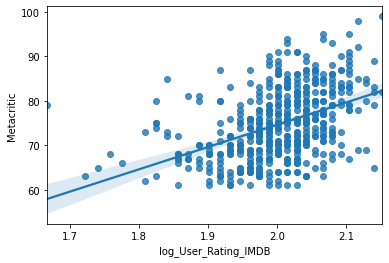

In [31]:
sns.regplot(x='log_User_Rating_IMDB', y = 'Metacritic', data = log_df)

In [54]:
pr = PolynomialFeatures()
X = df.loc[:,[ 'Lifetime_Gross_MOJO','Max_Theaters',
              'Opening_Box', 'Opening_Th', 'User_Rating_IMDB',
              'Number_of_votes_IMDB', 'Release_Difference', 'CBS Films',
              'Focus Features', 'IDP Distribution', 'IMAX', 'Lionsgate',
              'National Geographic Entertainment', 'Neon', 'Other', 'Overture Films',
              'Paramount Classics', 'Paramount Pictures',
              'Sony Pictures Entertainment (SPE)', 'United Artists',
              'Walt Disney Studios Motion Pictures', 'Warner Bros.',
              'Warner Independent Pictures (WIP)', 'log_Lifetime_Gross_MOJO',
              'log_Max_Theaters', 'log_Opening_Box', 'log_Opening_Th',
              'log_User_Rating_IMDB', 'log_Number_of_votes_IMDB']]
y = df.loc[:, ['Metacritic']]
pr.fit(X,y)
pr.score()

AttributeError: 'PolynomialFeatures' object has no attribute 'score'

In [ ]:
#residual
df['res'] = abs(m.predict)]

## Polynomial Features

In [69]:
df_poly = df.loc[:,['Rank_MOJO_by_Box_office', 'Lifetime_Gross_MOJO',
       'Max_Theaters', 'Opening_Box', 'Opening_Th', 'User_Rating_IMDB', 
       'Number_of_votes_IMDB', 'Release_Difference', 'CBS Films',
       'Focus Features', 'IDP Distribution', 'IMAX', 'Lionsgate',
       'National Geographic Entertainment', 'Neon', 'Other', 'Overture Films',
       'Paramount Classics', 'Paramount Pictures',
       'Sony Pictures Entertainment (SPE)', 'United Artists',
       'Walt Disney Studios Motion Pictures', 'Warner Bros.',
       'Warner Independent Pictures (WIP)']]
df_poly

,Rank_MOJO_by_Box_office,Lifetime_Gross_MOJO,Max_Theaters,Opening_Box,Opening_Th,User_Rating_IMDB,Number_of_votes_IMDB,Release_Difference,CBS Films,Focus Features,...,Neon,Other,Overture Films,Paramount Classics,Paramount Pictures,Sony Pictures Entertainment (SPE),United Artists,Walt Disney Studios Motion Pictures,Warner Bros.,Warner Independent Pictures (WIP)
0,1,119194771,2011.0,23920637.0,868.0,7.5,125629,8475.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,77437223,2506.0,137492.0,4.0,7.5,55375,8841.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4,72091016,3481.0,23234394.0,3481.0,7.2,38161,10428.0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,5,36262926,108.0,661185.0,49.0,7.5,1730,10171.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,7,32011576,1804.0,8825760.0,1804.0,8.0,14137,10239.0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,1972,2647,3.0,2647.0,3.0,6.8,2693,11200.0,0,0,...,0,1,0,0,0,0,0,0,0,0
520,1986,2324,1.0,1340.0,1.0,7.6,988,9555.0,0,0,...,0,1,0,0,0,0,0,0,0,0
521,1991,2214,2.0,2214.0,2.0,8.0,1647,9086.0,0,0,...,0,1,0,0,0,0,0,0,0,0
522,1998,1940,1.0,1452.0,1.0,7.7,1019,13055.0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [71]:
y = df.loc[:, ['Metacritic']]

In [70]:
poly_2 = PolynomialFeatures(degree=2)
df_poly2 = poly_2.fit_transform(df_poly) 

In [62]:
df_poly2.shape

(524, 351)

In [65]:
df_poly2.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [72]:
lin = LinearRegression()
lin.fit(df_poly2, y)

LinearRegression()

In [74]:
lin.score(df_poly2, y)

0.4248318254410083

In [75]:
lin.coef_

array([[-1.00216254e-01, -8.82846920e-02, -2.14280140e-03,
        -3.38909315e-01, -8.31140378e-04,  1.12055736e+00,
         6.58483737e-02,  5.83924655e-03,  1.24428698e-02,
        -2.94717577e-07,  3.32194532e-06,  4.25318107e-06,
        -4.39105007e-06, -3.02687820e-02,  3.47005327e-05,
         1.26458013e-04,  3.02681599e-02,  8.89516930e-10,
         1.23152225e-07,  5.95986939e-10,  4.26201693e-10,
        -4.64641187e-08,  9.06768493e-07, -8.47995597e-06,
        -1.67583598e-08, -4.00330295e-07,  2.85131719e-08,
         9.55349763e-06, -3.96889907e-09, -8.62084751e-05,
         2.85730397e-03,  9.38435778e-08, -6.18334042e-07,
         2.85898115e-08, -9.83246593e-05,  5.90321704e-09,
         2.90870693e-09,  6.43192772e-02,  6.05751998e-04,
         1.79699296e-01,  7.44926561e-02,  3.87104172e-09,
         2.26818647e-05,  3.77362552e-08,  1.12560872e-10,
        -2.36455861e-05, -4.25884281e-01, -6.77242426e-02,
        -4.65682707e-06, -1.44689816e-13, -9.47830057e-1

In [76]:
df_poly = df.loc[:,['Rank_MOJO_by_Box_office', 'Lifetime_Gross_MOJO',
       'Max_Theaters', 'Opening_Box', 'Opening_Th', 'User_Rating_IMDB', 
       'Number_of_votes_IMDB', 'Release_Difference', 'CBS Films',
       'Focus Features', 'IDP Distribution', 'IMAX', 'Lionsgate',
       'National Geographic Entertainment', 'Neon', 'Other', 'Overture Films',
       'Paramount Classics', 'Paramount Pictures',
       'Sony Pictures Entertainment (SPE)', 'United Artists',
       'Walt Disney Studios Motion Pictures', 'Warner Bros.',
       'Warner Independent Pictures (WIP)']]
y = df.loc[:, ['Metacritic']]
poly_3 = PolynomialFeatures(degree=3)
df_poly3 = poly_3.fit_transform(df_poly) 
lin3 = LinearRegression()
lin3.fit(df_poly3, y)
lin3.score(df_poly3,y)

0.42294098973880756

In [89]:
#add constant?
poly2model = sm.OLS(y, df_poly2)
poly2model = poly2model.fit()
poly2model.summary()

ValueError: exog is not 1d or 2d